In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.optimize as optimize
sns.set()
%matplotlib inline

In [140]:
np.random.seed(5)


#Sort


def optiport(weight):
    return weight.dot(cov).dot(weight)
def portreturns(weight):
    return weight.dot(returns)
def draw_efficient():
    bo=[(0,None) for i in range(len(weights)) ]
    xaxis=np.linspace(returns.min(),returns.max(),20)
    port=np.zeros((len(xaxis),2))
    ws=np.zeros((len(xaxis),len(weights)))
    
    for i,j in enumerate(xaxis):
        
        cons=({'type':'eq',
             'fun':lambda x: np.array(returns.dot(x)-j)},
              {'type':'eq',
              'fun':lambda x: np.array(np.sum(x)-1.0)}
             )
        opt=optimize.minimize(optiport,weights,constraints=cons,bounds=bo)
        port[i,:]=portreturns(opt.x),optiport(opt.x)        
        ws[i,:]=np.round(opt.x,3)
        
      
    plt.plot(volats,returns,'o')
    plt.plot(port[:,1],port[:,0],'r.-',linewidth=.3)
    plt.ylabel('Return')
    plt.xlabel('Variance')    
    return ws,port




def stacked_bar(data):  
    data=data.copy()
    colors=sns.color_palette("RdBu", n_colors=data.shape[1])
    for i in range(data.shape[1]):
        if i==0:
            plt.bar(range(len(data)), data[:,i],color=colors[i])
            bot=data[:,i]
        else:            
            plt.bar(range(len(data)), data[:,i],bottom=bot,color=colors[i])
            bot+=data[:,i]
      
    plt.legend([i for i in range(len(returns))],loc='best')
       





In [141]:
returns=np.array([17.97,21.4,11.48,17.58,15.79,22.23,17.52,9.15],dtype='float64')
volats=np.array([10.18,14.36,9.39,17.05,15.53,21.36,11.34,15.74],dtype='float64')
volats=volats[np.argsort(returns)[:]]
#Working with variances
returns.sort()
cov=np.diag(volats)



weights=np.ones(len(returns))*1/len(returns)
orig_port=weights

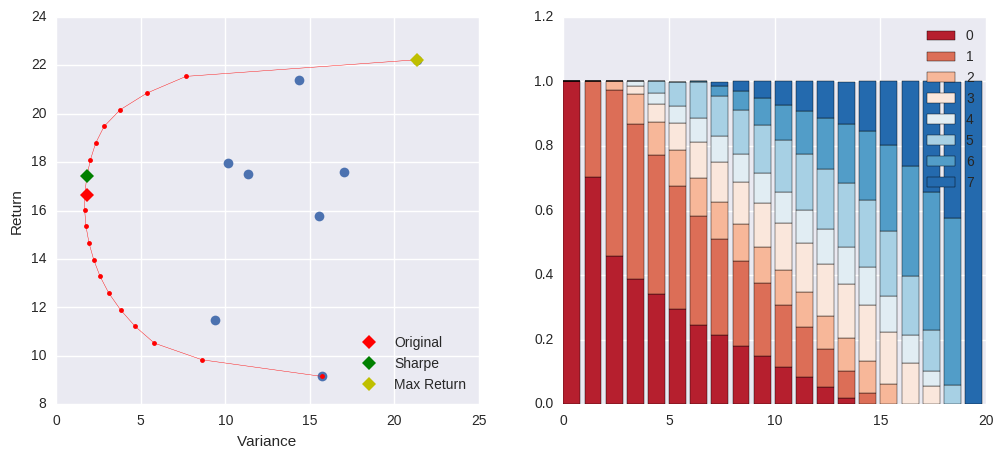

In [142]:
fig=plt.figure(figsize=(12,5))
ax1=fig.add_subplot(121)  
o,=plt.plot(optiport(weights),weights.dot(returns),'rD')
ws,port=draw_efficient()
sharp_port=np.argmax(port[:,0]/np.sqrt(port[:,1]))
yolo_port=np.argmax(port[:,0])
s,=plt.plot(optiport(ws[sharp_port,:]),ws[sharp_port,:].dot(returns),'gD')
y,=plt.plot(optiport(ws[yolo_port,:]),ws[yolo_port,:].dot(returns),'yD')
#plt.xlim([0,12])
#plt.ylim([0,12])
plt.legend((o,s,y),('Original','Sharpe','Max Return'),loc='best')
ax2=fig.add_subplot(122)
stacked_bar(ws)
yolo=ws[yolo_port,:]
sharpe=ws[sharp_port,:]


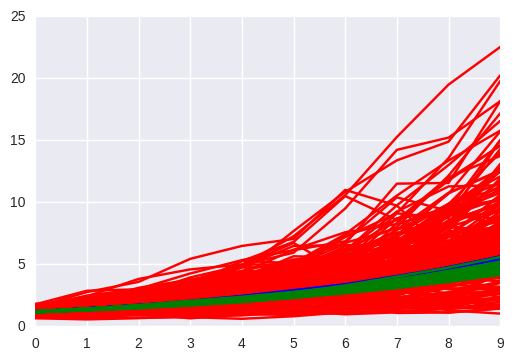

In [152]:
plt.figure()
years=10
sims=200

nums=(np.divide(np.random.normal(loc=portreturns(yolo),scale=optiport(yolo),size=(years,sims)),100)+1).cumprod(axis=0)
nums2=(np.divide(np.random.normal(loc=portreturns(sharpe),scale=optiport(sharpe),size=(years,sims)),100)+1).cumprod(axis=0)
nums3=(np.divide(np.random.normal(loc=portreturns(orig_port),scale=optiport(orig_port),size=(years,sims)),100)+1).cumprod(axis=0)
plt.plot(nums,'r')
plt.plot(nums2,'b')
_=plt.plot(nums3,'g')